<a href="https://colab.research.google.com/github/Shashanksangu99/Data-Analytics-Projects/blob/main/Roller_Coaster_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing Libraries and understanding the data**


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.core.frame
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

df=pd.read_csv('/content/drive/MyDrive/coaster_db.csv')

#Identifying the size, columns and basic details of data
print(df.shape)

df.head(10)

df.columns

df.dtypes

df.describe()



(1087, 56)


,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## **2. Data Preparation**

In [2]:
#Data Preparation

#Creating another dataframe with selected columns
df= df[['coaster_name',
    #'Length', 'Speed',
    'Location', 'Status', #'Opening date',
      # 'Type',
     'Manufacturer',
    #'Height restriction', 'Model', 'Height',
     #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',# 'height_value', 'height_unit',
    'height_ft',
        'Inversions_clean', 'Gforce_clean']].copy()

In [52]:
df.shape

df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [3]:
#Converting the Opening_date_clean datatype
df['opening_date_clean']= pd.to_datetime(df['opening_date_clean'])

df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [4]:
#Rename the columns
df= df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})
#Checking out the new column names
df.head()


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [5]:
#Identifying null values in each column
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [6]:
#Identifying the duplicate values
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [7]:
#identifying duplicates by subsetting columns
df.query('Coaster_Name =="Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [9]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

df.shape

(990, 13)

## **3. Analysing the Data**


1999    49
2000    47
1998    32
2011    31
2001    30
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64


Text(0, 0.5, 'Count')

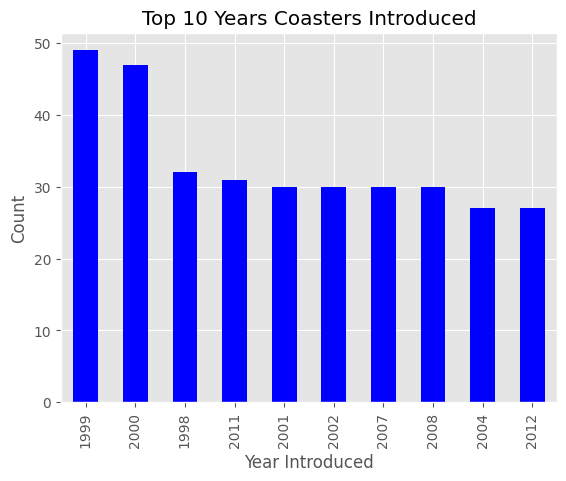

In [8]:
#Histogram of Years where most coasters were introduced
print(df['Year_Introduced'].value_counts())

ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced',color='blue')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

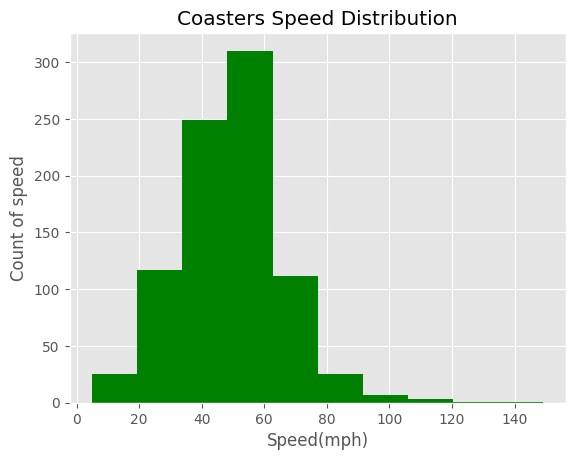

In [10]:
plt.hist(df['Speed_mph'],color='green')
plt.title("Coasters Speed Distribution")
plt.xlabel('Speed(mph)')
plt.ylabel('Count of speed')
plt.show()

Operating                                                         646
Removed                                                           133
Closed                                                             23
Under construction                                                 14
In Production                                                      11
Discontinued                                                        7
Chapter 7 bankruptcy; rides dismantled and sold; property sold      2
Not Currently Operating                                             1
closed for maintenance as of july 30 no reopening date known        1
Closed in 2021                                                      1
SBNO December 2019                                                  1
Temporarily Closed                                                  1
SBNO (Standing But Not Operating)                                   1
Temporarily closed                                                  1
Under Maintenance   

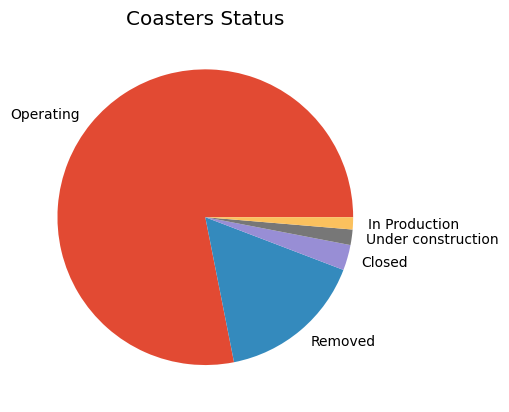

In [11]:
print(df['Status'].value_counts())

status_counts = df['Status'].value_counts().head(5)

plt.pie(status_counts, labels=status_counts.index)
plt.title("Coasters Status")
plt.show()

Text(0, 0.5, 'Height(ft)')

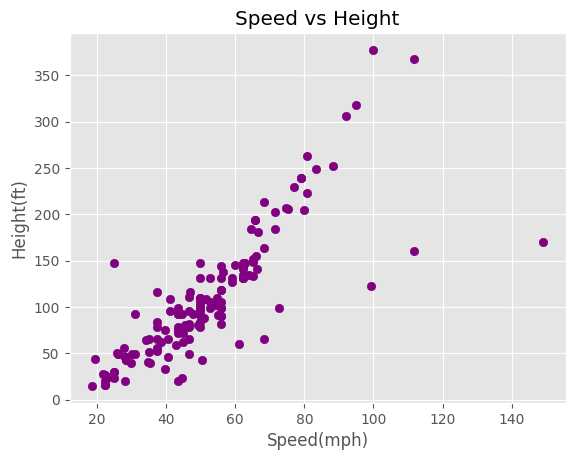

In [12]:
plt.scatter(df['Speed_mph'],df['Height_ft'],c='purple')
plt.title('Speed vs Height')
plt.xlabel('Speed(mph)')
plt.ylabel('Height(ft)')


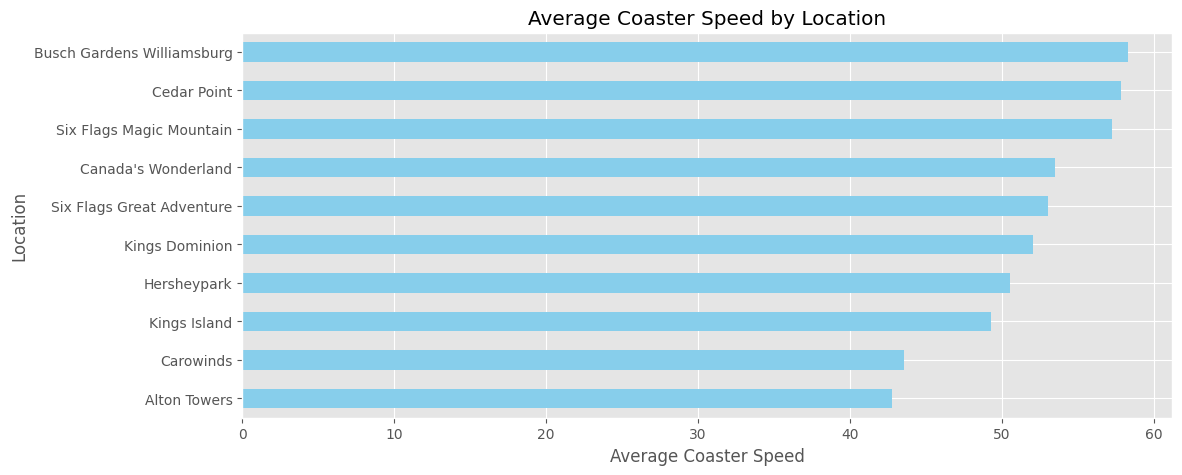

In [13]:


# Filter out rows where Location is "Other"
filtered_df = df[df['Location'] != "Other"]

# Group by 'Location', calculate mean and count of 'Speed_mph', filter by count >= 10, and sort by mean
grouped_df = filtered_df.groupby('Location')['Speed_mph'].agg(['mean', 'count']).query('count >= 10').sort_values('mean')

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 5))
grouped_df['mean'].plot(kind='barh', ax=ax, color='skyblue')
ax.set_title('Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')
ax.set_ylabel('Location')
plt.show()
